# Analysis of NYC Green Taxi data for the month of September 2015

#### Background

Green taxis are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan. 

In this notebook, I am using the data publicly made available on http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml for my analysis on New York City Green Taxi for September 2015. 

Firstly, I am doing some exploratory analysis on the dataset  to get an understanding of the dataset. I am then delving into cleaning the dataset, formatting it to make it user friendly and easy to understand.
Further on, I am building a model to predict the percentage tip a driver would expect on each trip. 
The code is fully written in python with few additional open-source libraries which are easy to install.

Some libraries that I have used are:
- scikit learn ( Used for modeling )
- matplotlib ( Used for plotting )
- seaborn ( Used for plotting ) 


#### Data Exploration

Step 1: Including the libraries that I intend to use

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import cross_val_score,cross_val_predict
from scipy.stats import ttest_ind
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#### Question 1 a: Programmatically download and load into your favorite analytical tool the trip data for September 2015.

The nature of any data science project is iterative; it changes as more insights from the available data becomes available. But since the datasets are huge, it is not feasible to download the datasets each time we resume work on an existing project.
Thus we should refrain from having to download the same datasets again and again.

In the code below, I am checking to see if I have the dataset already downloaded in my repository. If yes, I load it from my local drive onto this notebook server. Else I make a request call to the https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv to download the data again.

In [2]:
if os.path.exists('green_tripdata_2015-09.csv'): 
    data = pd.read_csv('green_tripdata_2015-09.csv')
else:
    data = pd.read_csv("https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv")
    data.to_csv("https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv".split('/')[-1])

#### Question 1 b: Report how many rows and columns of data you have loaded. 

The first step in any data exploration is finding out basic statistics about the data i.e the rows and columns. I am using pandas Dataframe function Dataframe.shape() that tells how many rows and colums have been loaded in the dataframe.

In [3]:
print("This dataset has ",data.shape[0]," rows and ",data.shape[1]," columns.")

This dataset has  1494926  rows and  21  columns.


Step 2: Taking a look at the data and some summary statistics

In this dataset, we have 21 columsn which are a mix of numeric, categorical and Datetime. From this analysis, I observe that some columns have null values. This indicates the data needs to be cleaned up before we proceed to do any analysis.

In [4]:
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [5]:
# Check the datatypes
data.dtypes

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object

In [6]:
data.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


In [7]:
# Check for null values
data.isnull().any()

VendorID                 False
lpep_pickup_datetime     False
Lpep_dropoff_datetime    False
Store_and_fwd_flag       False
RateCodeID               False
Pickup_longitude         False
Pickup_latitude          False
Dropoff_longitude        False
Dropoff_latitude         False
Passenger_count          False
Trip_distance            False
Fare_amount              False
Extra                    False
MTA_tax                  False
Tip_amount               False
Tolls_amount             False
Ehail_fee                 True
improvement_surcharge    False
Total_amount             False
Payment_type             False
Trip_type                 True
dtype: bool

#### Data Cleaning

Data Cleaning is a very crucial step in any data science project. In this step, data is explored further for outliers, inconsistent datatypes, missing data, null values,etc. In this step, decisions regarding how to handle the data problems are made. Based on these decisions, data is scrubbed, cleaned, reduced, modified, renamed, reshaped etc to conform to business needs.

For this dataset, I have performed the following data cleaning steps:

1. I am removing the column Ehail_fee as most of the values for this column are missing. So making any predictions for a substitute value would be incorrect. However in future if more information is made available, we can look at options other than dropping the column.
2. Trip_type column has null values so I am replacing the null values with the most frequently used Trip_type column. I have pre-computed this using mode() function and found that 1 is the most frequently used Trip_type.
3. RateCodeID has incorrect values like 99 which indicates error in data capture. We can either delete all such rows or can replace it with the most frequent value. I have pre-computed this using mode() function and found that 1 is the most frequently used RateCodeID.
4. Total_amount,Fare_amount, improvement_surcharge,Tip_amount,Tolls_amount,MTA_tax have negative values which are most likely errors in data capture. I am choosing to "not" delete such rows as it will lead to significant data loss. Under the assumption that these negative values are data capture errors, I am substituting these negative values with their absolute values.
5. Additionally, we know that the initial charge for any metered green taxi in NYC is 2.50 dollars.So we need to handle all transactions having total fare as less than 2.5. We can see that for all those trips where total fare is less than the base amount of 2.50 the payment code is either Cash, No Charge or Dispute. This might be an indication that the data for these trips might not have been recorded correctly. 

    This can be handled in several ways:

    a. Drop all incorrect rows.

    b. Replace the incorrect values with base rate 2.50+ any tax applicable based on the trip type in accordance with the           rate rules specified under "Metered Fare Section" of http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml
    
    I have used Method a as it seems more appropriate and efficient solution. I tried implementing Method b using location values and base rate values but it is time-consuming and needs more clarification. Substituting base rate for incorrect values needs more work around understanding the nature of the trips. Additionally it causes incorrect computations which is undesirable. 

In [8]:
# Ehail_fee was removed since 99% of the data are missing
data=data.drop(["Ehail_fee"],axis=1)

In [9]:
# Missing values in Trip_type were replace with the most common value that was 1
data["Trip_type "]=data['Trip_type '].replace(np.NaN,1)
data["Trip_type "]=data['Trip_type '].astype('int')

In [10]:
# Missing values in RateCodeID were replace with the most common value that was 1
indices_oi = data[~((data["RateCodeID"]>=1) & (data["RateCodeID"]<=6))].index
data.loc[indices_oi, "RateCodeID"] = 1
data["RateCodeID"]=data["RateCodeID"].replace(np.NaN,1)
data["RateCodeID"]=data["RateCodeID"].replace(np.inf,1)

In [11]:
# Replacing all negative values with their absolute values and dropping all rows where Total_amount is less than the minimun fare
data.Total_amount = data.Total_amount.abs()
data.Fare_amount = data.Fare_amount.abs()
data.improvement_surcharge = data.improvement_surcharge.abs()
data.Tip_amount = data.Tip_amount.abs()
data.Tolls_amount = data.Tolls_amount.abs()
data.MTA_tax = data.MTA_tax.abs()
data = data[data["Total_amount"]>=2.5]

In [12]:
print("This dataset now has ",data.shape[0]," rows and ",data.shape[1]," columns.")

This dataset now has  1490167  rows and  20  columns.


In [13]:
# Rechecking for null values
data.isnull().any()

VendorID                 False
lpep_pickup_datetime     False
Lpep_dropoff_datetime    False
Store_and_fwd_flag       False
RateCodeID               False
Pickup_longitude         False
Pickup_latitude          False
Dropoff_longitude        False
Dropoff_latitude         False
Passenger_count          False
Trip_distance            False
Fare_amount              False
Extra                    False
MTA_tax                  False
Tip_amount               False
Tolls_amount             False
improvement_surcharge    False
Total_amount             False
Payment_type             False
Trip_type                False
dtype: bool

#### Further analysis and plotting for Trip Distance

In this section, I am attempting to answer some specific questions related to trip distances.

#### Question 2 a: Plot a histogram of the number of the trip distance ("Trip Distance").

The plot below shows the log normal histogram for Trip distance. I have used log scale as the plot with raw values is difficult to interpret and read.

Using a log scale allows a large range to be displayed without small values being compressed down into bottom of the graph.

The section below describes the nature of the trip_distance histogram.

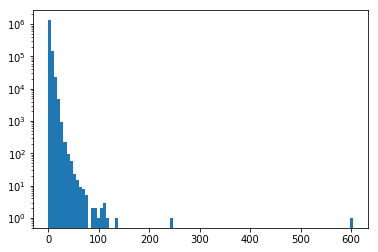

In [14]:
plt.hist(data['Trip_distance'], log=True,bins=100)
plt.show()

#### Question 2 b:  Report any structure you find and any hypotheses you have about that structure.

The Trip Distance is unimodal and asymmetrically distributed. It is skewed to the right and it has a median (1.98) smaller than its mean(2.96) and both smaller than the standard deviation (3.07). The skewness is due to the fact that the variable has a lower boundary of 0 as the distance can't be negative. This distribution has a structure of a lognormal distribution. 

The hypothesis: The asymmetric trip distance indicates that the trips are not random. If there were random, we would have a (symmetric) Gaussian or normal distribution. The non-zero autocorrelation may be related the fact that people taking ride are pushed by a common cause, for instance, people rushing to work.

#### 3 a: Report mean and median trip distance grouped by hour of day.

In this section, I am analyzing the trip distances and times of the day to get a rough estimate of how the traffic moves in NYC.

For this, I am creating two derived variables "Pick_up_hour" and "Drop_off_hour" that will help me get an estimate of trip distribution by hour of the day.

I now have two choices for finding the hour of the day for the trip:"Pick_up_hour" and "Drop_off_hour". 

In [15]:
# Retrieve only hour from the pickup time (which is in the format YYYY-MM-DD HH:MM:SS)
data["Pick_up_hour"]=pd.to_datetime(data['lpep_pickup_datetime']).dt.hour

In [16]:
data["Drop_off_hour"]=pd.to_datetime(data['Lpep_dropoff_datetime']).dt.hour

The Mean and Median Trip Distance by Hour of the Day is:

In [17]:
# Source : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
data.pivot_table(values=["Trip_distance"],index=["Pick_up_hour"],aggfunc=(np.mean,np.median))

Trip_distance       
                      mean median
Pick_up_hour                     
0                 3.116047   2.20
1                 3.017988   2.12
2                 3.047014   2.14
3                 3.212931   2.20
4                 3.525741   2.36
5                 4.133575   2.90
6                 4.060289   2.85
7                 3.286318   2.17
8                 3.046598   1.98
9                 3.001444   1.96
10                2.946830   1.92
11                2.914764   1.88
12                2.905474   1.89
13                2.880880   1.85
14                2.867459   1.83
15                2.858339   1.81
16                2.780910   1.80
17                2.679848   1.78
18                2.653199   1.80
19                2.715771   1.85
20                2.777519   1.90
21                2.999535   2.03
22                3.186087   2.20
23                3.191420   2.22

In [18]:
# Source : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
data.pivot_table(values=["Trip_distance"],index=["Drop_off_hour"],aggfunc=(np.mean,np.median))

Trip_distance       
                       mean median
Drop_off_hour                     
0                  3.239660   2.28
1                  3.131018   2.20
2                  3.144113   2.21
3                  3.226529   2.26
4                  3.463206   2.38
5                  4.192401   2.92
6                  3.933903   2.76
7                  3.219023   2.05
8                  2.923438   1.87
9                  3.017337   1.98
10                 3.014046   1.99
11                 2.882917   1.87
12                 2.908999   1.90
13                 2.892406   1.86
14                 2.770470   1.80
15                 2.773577   1.80
16                 2.767647   1.80
17                 2.691572   1.76
18                 2.673291   1.80
19                 2.746807   1.86
20                 2.800367   1.92
21                 2.931965   2.00
22                 3.146669   2.17
23                 3.231240   2.25

 ##### Visualizations summarizing the data related to Mean and Median trip times for each hour of the day
 
From the visualizations below, we can see that the mean and median pick up and drop off times for trips are in sync with the normal office timings for most people. We see high demand for taxis between 5 AM and 10 AM which is normal time range for people to go to office. Additionally we see a rising demand in taxis later in the evening after 6 PM which is the standard time for people to leave office and return back home.

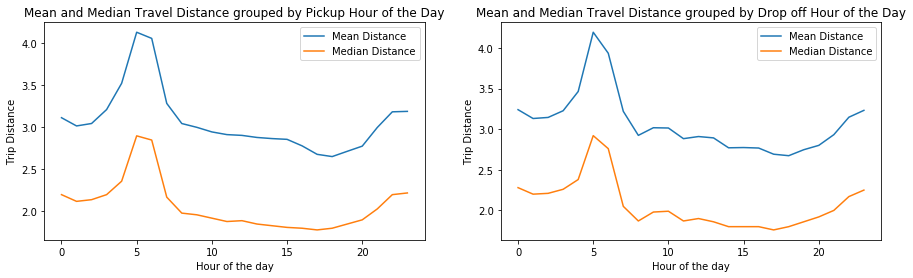

In [19]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,4))
ax1.plot(data.groupby(["Pick_up_hour"])['Trip_distance'].mean())
ax1.set_title("Mean and Median Travel Distance grouped by Pickup Hour of the Day")
ax1.set_xlabel("Hour of the day")
ax1.set_ylabel("Trip Distance")
ax1.plot(data.groupby(["Pick_up_hour"])['Trip_distance'].median())
ax1.legend(labels=("Mean Distance","Median Distance"))

ax2.plot(data.groupby(["Drop_off_hour"])['Trip_distance'].mean())
ax2.set_title("Mean and Median Travel Distance grouped by Drop off Hour of the Day")
ax2.set_xlabel("Hour of the day")
ax2.set_ylabel("Trip Distance")
ax2.plot(data.groupby(["Drop_off_hour"])['Trip_distance'].median())
ax2.legend(labels=("Mean Distance","Median Distance"))

plt.show()

#### Question 3 b: We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

#### There are two ways to find trips that originate or terminate at one of the NYC area airports

1. RateCodeID column in the dataframe: This column indicates the rate code in effect for that trip. This information along with the rate codes specified on http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml under the "Airport Trips" section helps us conclude that all trips with Rate code 2 originated/terminated in JFK Airport and all trips with Rate Code 3 originated/terminated in Newark Airport.
2. Use the Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude columns to select points to identify areas around the airport.
For eg: Newark airport co-ordinates are: 40.6895° N, 74.1745° W
and JFK airport co-ordinates are: 40.6413° N, 73.7781° W
We can then compare the location information for the pickup and drop points to classify them as airport or non-airport trips.


#### I have used the Method 1 as Method 2 is very time-consuming.

In the code below, I am creating new variables that will hold information related to airport trips only based on the RateCodeID that has been used for that trip.

In [20]:
trips_airport=data[(data["RateCodeID"]==2) | (data["RateCodeID"]==3)]
print("No of Airport trips are: ",trips_airport.shape[0])

No of Airport trips are:  5532


To calculate the average fare, I have two options:
- Fare Amount: This includes the fare amount without any tips.
- Total Amount: This includes the fare amount + tips

In [21]:
print("The average fare (without any tips) for the airport trips are $",round(trips_airport['Fare_amount'].mean(),2))
print("The average total fare amount for the aiport trips are $",round(trips_airport['Total_amount'].mean(),2))

The average fare (without any tips) for the airport trips are $ 51.55
The average total fare amount for the aiport trips are $ 59.86


#### Some other interesting facts about the airport trips

1. What is the peak time for airport trips?

I am using the derived variables Pick_up_hour and Drop_off_hour to find the most common hour at which NYC residents have used Green taxis.

Based on my analysis, I report that the most frequent pickup time for airport trips is around 03:00 PM and the most frequent drop off time for airport trips is around 04:00 PM

In [22]:
# Other interesting facts about the airport trips
# 1. Maximum airport trips are at what time of the day?
from datetime import datetime
freq_pick_up = trips_airport['Pick_up_hour'].mode()[0]
d = datetime.strptime(str(freq_pick_up), "%H")
print("The most frequent pickup time for airport trips is around",d.strftime("%I:%M %p"))
freq_drop_off = trips_airport['Drop_off_hour'].mode()[0]
d = datetime.strptime(str(freq_drop_off), "%H")
print("The most frequent drop off time for airport trips is around",d.strftime("%I:%M %p"))


The most frequent pickup time for airport trips is around 03:00 PM
The most frequent drop off time for airport trips is around 04:00 PM


In the plot below, I have plotted the no of airport trips by the hour of the day. From the plot below, we can see great demand for green taxis at midnight and slowly increasing demand in early morning at 4. The demand reduces in the evening.

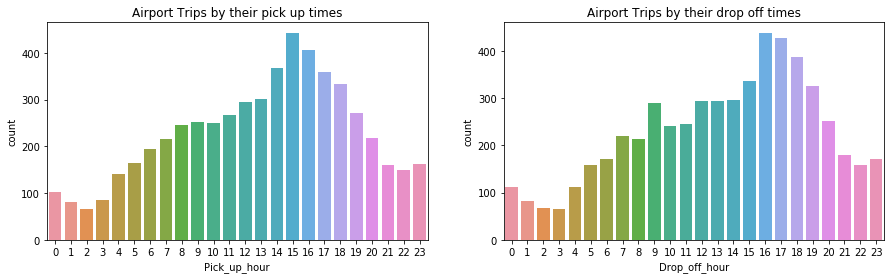

In [23]:
# Lets plot the airport trips as per the hour of the day
import seaborn as sns

f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,4))
sns.countplot(x='Pick_up_hour', data=trips_airport,ax=ax1).set_title('Airport Trips by their pick up times');
sns.countplot(x='Drop_off_hour', data=trips_airport,ax=ax2).set_title('Airport Trips by their drop off times');
plt.show()

2. Do people going to the airport tip more?

I am creating another variable to hold the data related to non-airport trips. Then I am comparing the average tip for the airport trips vs non-airport trips to see whether people who travel to/from the airport tip more or less?

From my analysis, I see that people who travel to/from airport tip more.
My hypothesis is that this could partially be because the tip paid is usually a percentage of the total fare amount. Since non-airport trips are shorter, the total fare would be smaller than the the total fare for the airport trips. Further analysis can be done on this to check; however due to time constarints I am refraining from delving any further into exploring this possibility.

In [24]:
trips_non_airport=data.loc[~data.index.isin(trips_airport.index)]
#3.Do people travelling to/from airport tip more?

print("People who travel to/from airport give average tips of: $",round(trips_airport["Tip_amount"].mean(),2))
print("People who travel to/from airport give average tips of: $",round(trips_non_airport["Tip_amount"].mean(),2))

People who travel to/from airport give average tips of: $ 4.37
People who travel to/from airport give average tips of: $ 1.23


#### Question 4 a: Build a derived variable for tip as a percentage of the total fare.

In this section, I am doing some analysis to answer specific questions related to tips. Further more, I will be building a model to predict the tip as percentage of total fare.

In [25]:
# Creating a derived variable percentage tip as a fraction of total fare.
data["Percentage_tip"]=(data["Tip_amount"]*100)/data["Total_amount"]

The table below shows the Total amount, the Tip Amount and the Tip Percentage.

In [26]:
data[["Total_amount","Tip_amount","Percentage_tip"]].head()

,Total_amount,Tip_amount,Percentage_tip
0,9.75,1.95,20.00000
1,45.00,0.00,0.00000
2,5.80,0.50,8.62069
3,6.30,0.00,0.00000
4,6.30,0.00,0.00000


#### Question 4 b: Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

In this section, I am building the model to predict tip as percentage of the total fare. I am using the newly created variable Percentage_tip as my target. For my predictors, I am dropping some variables that are irrelevant to the percentage tip calculation.I am using both numeric (integer/float) as well as categorical variables for my model. For the modeling, I am using the Random Forest Regressor algorithm. I am using a regressor algorithm as opposed to a classifier as my target variable is a continuous variable and not discrete/categorical.

#### Steps in the modelling process are:

1. Data Cleaning : 
I am dropping the Store_and_fwd_flag,lpep_pickup_datetime, Lpep_dropoff_datetime columns from the predictors.
Store_and_fwd_flag has no relation to whether a person will tip or no. 
Instead of lpep_pickup_datetime, Lpep_dropoff_datetime columns, I am using the derived variables Pick_up_hour and Drop_off_hour.

2. Splitting the data into train/test: I am using 20% of the data as test set and I am training my model on 80% of the remaining data.

3. Fitting the model: I am initializing the model and fitting the initialized model onto my training data.

4. Checking performance: I am fitting the trained model onto my test set and I am using R2 score as my metric to check for accuracy.

5. Plotting: I am using a scatter plot to plot the expected tip percentages v/s predicted tip percentages to get a visual feel of the performance of the model.

Important information regarding some concepts:

- Random Forest Regressor: 
    ##### A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).
    [Source: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html ]
    

- Train/ Test Split: 
    ##### It is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set. This helps avoid overfitting. Overfitting is a modeling error which occurs when a function is too closely fit to a limited set of data points. Overfitting the model generally takes the form of making an overly complex model to explain idiosyncrasies in the data under study. 
    [Source: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation ]
    

- R2 value:
    ##### R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression line approximates the real data points. An R2 of 1 indicates that the regression line perfectly fits the data.


#### Methods attempted before deciding RandomForestRegressor: Multiple Linear Regression

Since the nature of the target variable is continuous, I refrain from using a classifier for prediction. I have tried using the Multiple Linear Regression model for this data. However some predictors in the data are correlated and the correlation matrix for the predictors showed very high values which are unsuitable for a linear regressor. 

However an ensemble learning method like Random forest is robust to multicollinearity problems because a random subset of features is chosen for each tree in a random forest. Other reasons for choosing this includes the fact that random forests do not overfit  and it is fast and can handle larget datasets efficiently. 

After running both the regrrssion algorithms, I got a R2 score of 77% for multiple linear regression whereas 99% for Random Forest.

#### How to run a sample on this model

1. Create a sample input similar to this:

   ###### sample_values=pd.DataFrame(X_test[5:6])
    
    
2. Use the fitted model to predict the target value tip_percentage

   ###### predicted_test = rf.predict(sample_values)
    
    
3. Check to see if the predicted_test is equal to the actual test value

   ###### print("Predicted Value is:",predicted_test," and Actual Value is: "actual_value)


In [27]:
# Preparing the model for prediction
predictors=data.drop(['Percentage_tip','Store_and_fwd_flag','lpep_pickup_datetime','Lpep_dropoff_datetime'],axis=1)
target=data["Percentage_tip"]

In [28]:
predictors.head()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Pick_up_hour,Drop_off_hour
0,2,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,0.0,9.75,1,2,0,0
1,2,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,0.0,45.00,1,2,0,0
2,2,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,0.3,5.80,1,1,0,0
3,2,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1,0,0
4,2,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1,0,0


In [29]:
target.head()

0    20.00000
1     0.00000
2     8.62069
3     0.00000
4     0.00000
Name: Percentage_tip, dtype: float64

## Making the actual model

In [30]:
# Creating the train/test split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Using python skicit learn RandomForestRegressor
rf = RandomForestRegressor()

# Fitting the model onto the training set
rf.fit(X_train, y_train)

# Predicting values for target
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

In [31]:
# The number of random_trees generates is:
print("The number of random forests in this process:",len(rf.estimators_))

The number of random forests in this process: 10


#### Calculating the metrics to check for model performance.

R2 score: 0.99

In [32]:
# Metrics to check for accuracy
test_score = r2_score(y_test, predicted_test)
print("R2 score is:",test_score)

R2 score is: 0.999876812995


Futher more , we can see how much each predictor contributes in the model to find the tip percentage.

In [33]:
feature_import = pd.DataFrame(data=rf.feature_importances_, index=predictors.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

,Tip_amount,Fare_amount,Total_amount,Tolls_amount,RateCodeID,Trip_type,MTA_tax,Extra,Trip_distance,Pickup_longitude,Dropoff_longitude,Pickup_latitude,Dropoff_latitude,VendorID,Pick_up_hour,Drop_off_hour,Passenger_count,improvement_surcharge,Payment_type
values,0.928309,0.053238,0.017553,0.000519,0.000108,0.000095,0.000066,0.000032,0.000031,0.000008,0.000007,0.000007,0.000006,0.000006,0.000005,0.000005,0.000001,9.304940e-07,3.561538e-08


### Plotting the model results for training set

From the scatter plot below, we can see that the model does an extremely well job in predicting tip percentage on train data. We do see some outliers that deviate from the line but the overall performance of the model is pretty good.

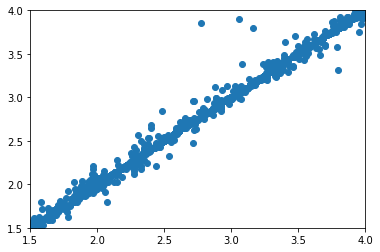

In [34]:
plt.scatter(x=y_train, y=predicted_train)
plt.xlim([1.5,4])
plt.ylim([1.5,4])
plt.plot([1.5,4],[1.5,4])
plt.show()

### Plotting the model results for test set

From the scatter plot below, we can see that the model does a fairly good job in predicting tip percentage on test data. We do see some outliers that deviate from the line but the overall performance of the model is good.

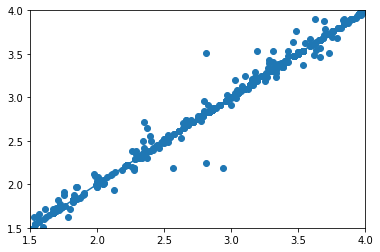

In [35]:
plt.scatter(x=y_test, y=predicted_test)
plt.xlim([1.5,4])
plt.ylim([1.5,4])
plt.plot([1.5,4],[1.5,4])
plt.show()

#### Future Work: 
From the Features Ranking, we see that the model does not need all the predictors. Some predictors have hardly any contribution to the model. In future iterations of the project, I plan on reducing the number of features to retain only the most relevant ones. 
This will make the model simpler and easily interpretable.

In this section, I am doing analysis to answer specific questions related to Distributions of average speed over the course of the trip.

#### Question 5 a : Build a derived variable representing the average speed over the course of a trip.

Here I first calculate the trip_time as the time difference between the time a passenger was dropped and the time the passenger was picked up.

I then calculate the average speed as Trip Distance/trip time.

I do some data cleaning to replace all NAN and INF values with 0.

NAN: In computing, NaN, standing for not a number, is a numeric data type value representing an undefined or unrepresentable value, especially in floating-point calculations. 

INF: In Python, inf stands for infinity - a value that is greater than any other value. -inf is therefore smaller than any other value.



In [36]:
# obtain trip time by subtracting pickup from dropoff time
trip_time = pd.to_datetime(data["Lpep_dropoff_datetime"]) - pd.to_datetime(data['lpep_pickup_datetime'])

# obtain speed in miles per hour
data["avg_speed"] = data['Trip_distance']/(trip_time.dt.total_seconds()/(60*60))

# remove inf values
data["avg_speed"].replace(to_replace=np.nan, value=0,inplace = True)
data["avg_speed"].replace(to_replace=np.inf,value=0,inplace = True)
data[["avg_speed","Trip_distance"]].head()

,avg_speed,Trip_distance
0,0.000000,0.00
1,0.000000,0.00
2,13.792208,0.59
3,10.829268,0.74
4,8.926829,0.61


#### Question 5 b : Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

Here, I am calculating the no of weeks in September and creating a new derived variable week that willhold the week the trip was made. Later on, I use this variable to calculate the average speed by week in the month of Spetmeber and to formulate my hypothesis.

For my hypothesis, I am using the 2 sided pairwise t-student test to check whether the average speeds are materially the same in all weeks of September.

My hypothesis is as follows:

Null Hypothesis: The average speed is consistent throughout the weeks. i.e. The average speed is same for each week of September.

Alternative Hypothesis: The average speed changes based on the week.

Analysis: From the t-test, we see that we cannot reject null hypothesis for {Week 2 and 3} and {Week 1 and 4} at 95% confidence level. This indicates that these pair of weeks have identical Average Speeds. We can reject the null hypothesis for other week pairs. 

Conclusion: The null hypothesis is rejected and we see some variation in speeds for different weeks of September. Alternatively, the Average speed may be dependent on the week of the month.

In [37]:
# Source: https://docs.python.org/3/library/datetime.html#datetime.date.isocalendar
data['lpep_pickup_datetime'] = data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data['Lpep_dropoff_datetime'] = data.Lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
ref_week = dt.datetime(2015,9,1).isocalendar()[1]
data['Week'] = data.lpep_pickup_datetime.apply(lambda x:x.isocalendar()[1])-ref_week+1

In [38]:
print("mean speed by week:\n", data.groupby('Week')["avg_speed","Week"].mean())

mean speed by week:
       avg_speed  Week
Week                 
1     15.886992     1
2     15.284310     2
3     15.178266     3
4     16.145174     4
5     16.947466     5


In [39]:
weeks = pd.unique(data.Week)
pvals = []

for i in range(5): # for each pair, run t-test
    for j in range(5):
        pvals.append((weeks[i], weeks[j],ttest_ind(data[data["Week"]==weeks[i]]["avg_speed"],data[data["Week"]==weeks[j]]["avg_speed"])[1]))
        #print(ttest_ind(data[data.Week==i]["avg_speed"],data[data.Week==j]["avg_speed"])[1])
pvalues = pd.DataFrame(pvals,columns=['w1','w2','pval'])
print("p-values:\n")
pvalues.pivot_table(index='w1',columns='w2',values='pval').T

p-values:



w1,1,2,3,4,5
w2,,,,,
1,1.000000,0.055926,0.020144,0.481442,0.339544
2,0.055926,1.000000,0.722674,0.014569,0.104325
3,0.020144,0.722674,1.000000,0.005055,0.083203
4,0.481442,0.014569,0.005055,1.000000,0.461813
5,0.339544,0.104325,0.083203,0.461813,1.000000


#### Question 5 c: Can you build up a hypothesis of average trip speed as a function of time of day?

I am using the pairwise t-student test as well as visualization to perform hypothesis on average speed as function of time of the day.

Null Hypothesis: The average speed is consistent throughout the day. i.e. The average speed is same for each hour of each day.

Alternative Hypothesis: The average speed changes based on the hour.

Analysis: From the t-test, we see that the p-values are extremely small for most hours of the day. Thus I reject the null hypothesis that average speed is consistent throughout the day.This is further supported  by the visualizations where we see varying average speeds throughout the day. 

Conclusion: The average speed changes based on hour of the day. We see high average speeds early in the mornig  before the office rush starts (around 6 Am), the speeds then reduce as day progresses.It then increases again during afternoon at around 3 PM and is less until later in the evening.

In [40]:
hour_pvals = []

for i in range(23): # for each pair, run t-test
    for j in range(23):
        hour_pvals.append((i, j,ttest_ind(data[data["Pick_up_hour"]==i]["avg_speed"],data[data["Pick_up_hour"]==j]["avg_speed"])[1]))
pvalues = pd.DataFrame(hour_pvals,columns=['w1','w2','pval'])
print("p-values:\n")
pvalues.pivot_table(index='w1',columns='w2',values='pval').T

p-values:



w1,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
w2,,,,,,,,,,,,,,,,,,,,,
0,1.000000e+00,6.415077e-01,2.887256e-01,1.210535e-01,7.065498e-02,1.326802e-09,3.103773e-03,2.626084e-02,3.338300e-02,4.959754e-05,...,2.069054e-02,4.887510e-10,7.054710e-08,1.551197e-07,0.487817,1.643634e-09,2.878898e-09,9.341036e-06,2.069646e-02,1.154826e-01
1,6.415077e-01,1.000000e+00,4.915627e-01,2.030551e-01,1.152157e-01,1.287486e-08,4.512502e-03,3.117892e-03,1.404768e-02,6.050797e-07,...,5.896517e-03,5.401141e-13,1.586116e-09,7.324873e-09,0.458037,2.283781e-11,1.031440e-11,3.837794e-07,2.474024e-03,3.342881e-02
2,2.887256e-01,4.915627e-01,1.000000e+00,5.627355e-01,3.525996e-01,1.554153e-06,3.487396e-02,6.526028e-04,7.118492e-03,8.449487e-08,...,2.334090e-03,2.204900e-13,8.872799e-10,4.745746e-09,0.418706,1.263146e-11,2.678734e-12,1.014545e-07,3.550750e-04,8.386860e-03
3,1.210535e-01,2.030551e-01,5.627355e-01,1.000000e+00,6.873916e-01,4.410005e-05,1.253609e-01,9.912556e-05,4.039799e-03,7.056546e-09,...,9.974720e-04,3.894717e-14,4.131583e-10,2.906929e-09,0.396500,6.059505e-12,4.933127e-13,2.715282e-08,4.751030e-05,2.178150e-03
4,7.065498e-02,1.152157e-01,3.525996e-01,6.873916e-01,1.000000e+00,5.024515e-04,3.224361e-01,1.584662e-04,3.667942e-03,3.869434e-08,...,9.725274e-04,1.789413e-12,2.573898e-09,1.221236e-08,0.377489,4.746285e-11,5.969147e-12,6.497694e-08,3.990915e-05,1.396775e-03
5,1.326802e-09,1.287486e-08,1.554153e-06,4.410005e-05,5.024515e-04,1.000000e+00,5.826179e-03,3.456705e-10,1.325577e-09,9.261994e-16,...,9.952154e-11,2.874252e-19,5.985060e-18,7.195988e-18,0.014933,2.168298e-22,2.450501e-23,5.217567e-19,2.018121e-16,8.063965e-14
6,3.103773e-03,4.512502e-03,3.487396e-02,1.253609e-01,3.224361e-01,5.826179e-03,1.000000e+00,6.854848e-07,2.171284e-04,1.144065e-11,...,2.435182e-05,2.555555e-16,3.267762e-12,2.800260e-11,0.260514,1.574207e-14,3.674833e-16,5.123544e-11,3.581493e-08,9.735355e-06
7,2.626084e-02,3.117892e-03,6.526028e-04,9.912556e-05,1.584662e-04,3.456705e-10,6.854848e-07,1.000000e+00,7.939660e-01,1.011294e-01,...,7.953967e-01,7.671548e-05,3.163535e-03,5.635452e-03,0.965542,1.139385e-03,1.849868e-03,8.117504e-02,5.863530e-01,3.334270e-01
8,3.338300e-02,1.404768e-02,7.118492e-03,4.039799e-03,3.667942e-03,1.325577e-09,2.171284e-04,7.939660e-01,1.000000e+00,4.194133e-01,...,9.692256e-01,1.162734e-02,3.792385e-02,4.202379e-02,0.967621,1.871255e-02,4.085070e-02,2.751358e-01,4.484881e-01,2.637293e-01


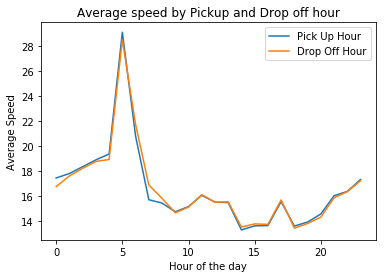

In [41]:
plt.plot(data.groupby(["Pick_up_hour"])['avg_speed'].mean())
plt.title("Average speed by Pickup and Drop off hour")
plt.xlabel("Hour of the day")
plt.ylabel("Average Speed")
plt.plot(data.groupby(["Drop_off_hour"])['avg_speed'].mean())
plt.legend(labels=("Pick Up Hour","Drop Off Hour"))
plt.show()

#### Future Work

This dataset has vast opportunties for analysis which due to time constraints I cannot perform at this point in time.
Some options for future work include:

1. Outlier Handling: There is an outlier in trip_distance which is 600. This is 3 standard deviations away from the mean. I had planned to do some further analysis on this but couldn't find much relevant information related to it.I have not dropped this value from my analysis. It would be interesting to see if dropping this row has any severe impact on the analysis outcomes.
2. The existing location variables can be explored to answer some more interesting question regarding utilization of taxi service by region.

#### Conclusion

I have explored the dataset and answered the questions asked as part of Capital One Coding Challenge to the best of my ability.
All my references have been quoted and included and I have tried my best to explain the steps I followed in detail.